# Node classification - Real world dataset

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [7]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/real'

jsonpath = f'/cluster/home/kamara/Explain/configs/config_real.json'
ranges = get_param_ranges(jsonpath)

df_sparsity = pd.read_csv(os.path.join(dir, f'nc_real_sparsity.csv'), index_col = 0)
res = df_sparsity.groupby(by=['dataset', 'sparsity', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()

In [8]:
def explainer_type(row):
    if row['explainer_name'] in ['gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx'] :
      return('pertubation')
    elif row['explainer_name'] in ['sa', 'ig'] :
      return('gradient')
    return('baseline')

df_sparsity['type'] = df_sparsity.apply(lambda row: explainer_type(row), axis=1)

In [9]:
df_sparsity = df_sparsity.reset_index()
df_sparsity

,dataset,sparsity,explainer_name,num_test,fidelity_acc+,fidelity_acc-,fidelity_prob+,fidelity_prob-,mask_sparsity,expl_edges,time,number_of_edges,mask_sparsity_init,non_zero_values_init,type,1-fidelity_acc-,1-fidelity_prob-,charact
0,citeseer,0.000,distance,100.0,0.48,0.02,0.417377,-0.046409,0.526977,5880.15,0.8628,12431.0,0.526977,5880.15,baseline,0.98,1.046409,0.596737
1,citeseer,0.000,gnnexplainer,100.0,0.48,0.02,0.417377,-0.046409,0.994482,68.59,0.6132,12431.0,0.994482,68.59,pertubation,0.98,1.046409,0.596737
2,citeseer,0.000,ig,100.0,0.61,-0.08,0.473731,-0.135594,0.299844,8703.64,0.3729,12431.0,0.299844,8703.64,gradient,1.08,1.135594,0.668561
3,citeseer,0.000,occlusion,100.0,0.48,0.02,0.417377,-0.046409,0.994482,68.59,0.9650,12431.0,0.994482,68.59,pertubation,0.98,1.046409,0.596737
4,citeseer,0.000,pagerank,100.0,0.48,0.02,0.417377,-0.046409,0.000102,12429.73,0.8635,12431.0,0.000102,12429.73,baseline,0.98,1.046409,0.596737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,pubmed,0.997,occlusion,100.0,0.38,-0.05,0.328527,-0.090292,0.998614,150.15,2.1910,108365.0,0.996550,373.82,pertubation,1.05,1.090292,0.504913
123,pubmed,0.997,pagerank,100.0,0.43,-0.04,0.382655,-0.083800,0.997001,325.00,1.3103,108365.0,0.000015,108363.35,baseline,1.04,1.083800,0.565611
124,pubmed,0.997,pgmexplainer,100.0,0.37,-0.06,0.316709,-0.103012,0.997617,258.21,85.4054,108365.0,0.986501,1462.85,pertubation,1.06,1.103012,0.492116
125,pubmed,0.997,random,100.0,-0.03,0.43,-0.073804,0.385291,0.997001,325.00,0.0009,108365.0,0.000009,108364.00,baseline,0.57,0.614709,-0.167750


# Explain focus: Phenomenon

true_label_as_target = True

In [ ]:
df = df_sparsity[df_sparsity['true_label_as_target']==True]

In [ ]:
df["1-fidelity_acc-"] = 1- df["fidelity_acc-"]
df["1-fidelity_prob-"] = 1- df["fidelity_prob-"]
df['charact'] = 2 * df['fidelity_prob+'] * (1-df['fidelity_prob-'])/ (df['fidelity_prob+']  + 1-df['fidelity_prob-'])


## Hard mask

In [ ]:
df_hard = df[df.hard_mask==True]

### Initial analysis: initial sparsity, time, characterisation

In [11]:
df0 = df_hard.groupby(by=['dataset', 'explainer_name', 'sparsity', 'true_label_as_target', 'hard_mask']).mean()
df0 = df0.reset_index()
df0s = df0[df0.sparsity==0.7]
res_init = df0s[['dataset', 'explainer_name', 'mask_sparsity_init', 'non_zero_values_init', 'number_of_edges', 'time', 'fidelity_prob+', 'fidelity_prob-', 'charact']]
res_init.groupby(by=['dataset', 'explainer_name']).mean()


mask_sparsity_init  non_zero_values_init  \
dataset  explainer_name                                             
citeseer distance                  0.526977               5880.15   
         gnnexplainer              0.994482                 68.59   
         ig                        0.299844               8703.64   
         occlusion                 0.994482                 68.59   
         pagerank                  0.000102              12429.73   
         pgmexplainer              0.988172                147.04   
         random                    0.000080              12430.00   
         sa                        0.589878               5098.23   
cora     distance                  0.095791              11993.43   
         gnnexplainer              0.985415                193.45   
         ig                        0.229293              10222.66   
         occlusion                 0.985415                193.45   
         pagerank                  0.000075              13263.00   
         pgmexplainer              0.970294                394.02   
         random                    0.000075              13263.00   
         sa                        0.710556               3839.19   
facebook distance                  0.000031             364104.84   
         gnnexplainer              0.982843               6247.02   
         ig                        0.010606             360254.23   
         occlusion                 0.982843               6247.02   
         pagerank                  0.000003             364114.99   
         pgmexplainer              0.957228              15573.82   
         random                    0.000003             364115.00   
         sa                        0.869481              47524.12   
pubmed   distance                  0.000077             108356.70   
         gnnexplainer              0.996550                373.82   
         ig                        0.179674              88894.67   
         occlusion                 0.996550                373.82   
         pagerank                  0.000015             108363.35   
         pgmexplainer              0.986501               1462.85   
         random                    0.000009             108364.00   
         sa                        0.507913              53324.96   

                         number_of_edges     time  fidelity_prob+  \
dataset  explainer_name                                             
citeseer distance                12431.0   0.8449        0.417377   
         gnnexplainer            12431.0   0.6514        0.417377   
         ig                      12431.0   0.3462        0.486125   
         occlusion               12431.0   1.0260        0.417377   
         pagerank                12431.0   0.7109        0.417377   
         pgmexplainer            12431.0  20.6441        0.417377   
         random                  12431.0   0.0002       -0.027290   
         sa                      12431.0   0.0442        0.245266   
cora     distance                13264.0   0.2911        0.645822   
         gnnexplainer            13264.0   0.7191        0.645822   
         ig                      13264.0   0.2082        0.655692   
         occlusion               13264.0   0.5732        0.645822   
         pagerank                13264.0   0.2866        0.645822   
         pgmexplainer            13264.0  13.4936        0.645822   
         random                  13264.0   0.0002        0.011973   
         sa                      13264.0   0.0097        0.205937   
facebook distance               364116.0   1.7054        0.625206   
         gnnexplainer           364116.0   0.6247        0.625206   
         ig                     364116.0   0.7680        0.611616   
         occlusion              364116.0  16.8419        0.625206   
         pagerank               364116.0   2.2881        0.625206   
         pgmexplainer           364116.0  87.1153        0.625206   
         random       

In [13]:
#### Initial mask sparsity ####
mask_spars_init = pd.pivot_table(res_init, values='mask_sparsity_init', index=['explainer_name'], columns='dataset')
mask_spars_init['mean_sparsity'] = mask_spars_init.mean(axis=1)
mask_spars_init.sort_values(by=['mean_sparsity'])

dataset,citeseer,cora,facebook,pubmed,mean_sparsity
explainer_name,,,,,
random,0.000080,0.000075,0.000003,0.000009,0.000042
pagerank,0.000102,0.000075,0.000003,0.000015,0.000049
distance,0.526977,0.095791,0.000031,0.000077,0.155719
ig,0.299844,0.229293,0.010606,0.179674,0.179854
sa,0.589878,0.710556,0.869481,0.507913,0.669457
pgmexplainer,0.988172,0.970294,0.957228,0.986501,0.975549
gnnexplainer,0.994482,0.985415,0.982843,0.996550,0.989823
occlusion,0.994482,0.985415,0.982843,0.996550,0.989823


In [14]:
#### Computation Time ####
df_time = pd.pivot_table(res_init, values='time', index=['explainer_name'], columns='dataset')
df_time['mean_time'] = df_time.mean(axis=1)
df_time.sort_values(by=['mean_time'])

dataset,citeseer,cora,facebook,pubmed,mean_time
explainer_name,,,,,
random,0.0002,0.0002,0.0031,0.0012,0.001175
sa,0.0442,0.0097,0.0233,0.0446,0.030450
ig,0.3462,0.2082,0.7680,0.6640,0.496600
gnnexplainer,0.6514,0.7191,0.6247,0.6120,0.651800
distance,0.8449,0.2911,1.7054,1.2850,1.031600
pagerank,0.7109,0.2866,2.2881,1.3649,1.162625
occlusion,1.0260,0.5732,16.8419,2.2171,5.164550
pgmexplainer,20.6441,13.4936,87.1153,91.9499,53.300725


In [15]:
#### Average characterization power among datasets for sparsity=0.7 ####
df_char = pd.pivot_table(res_init, values='charact', index=['explainer_name'], columns='dataset')
df_char['mean_charact'] = df_char.mean(axis=1)
df_char.sort_values(by=['mean_charact'])

dataset,citeseer,cora,facebook,pubmed,mean_charact
explainer_name,,,,,
random,-0.056493,0.023569,-0.060005,-0.116954,-0.052471
sa,0.383737,0.308424,-0.027676,-0.030185,0.158575
distance,0.596737,0.792529,0.780048,0.565611,0.683731
gnnexplainer,0.596737,0.792529,0.780048,0.565611,0.683731
occlusion,0.596737,0.792529,0.780048,0.565611,0.683731
pagerank,0.596737,0.792529,0.780048,0.565611,0.683731
pgmexplainer,0.597320,0.795464,0.782860,0.565611,0.685314
ig,0.684219,0.818607,0.775031,0.659558,0.734354


### Analysis after mask tranformation

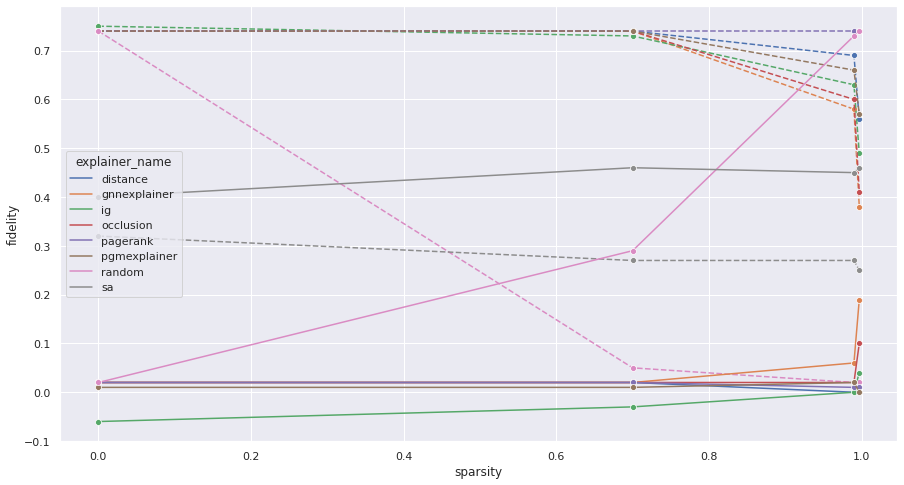

In [21]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_hard[df_hard.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

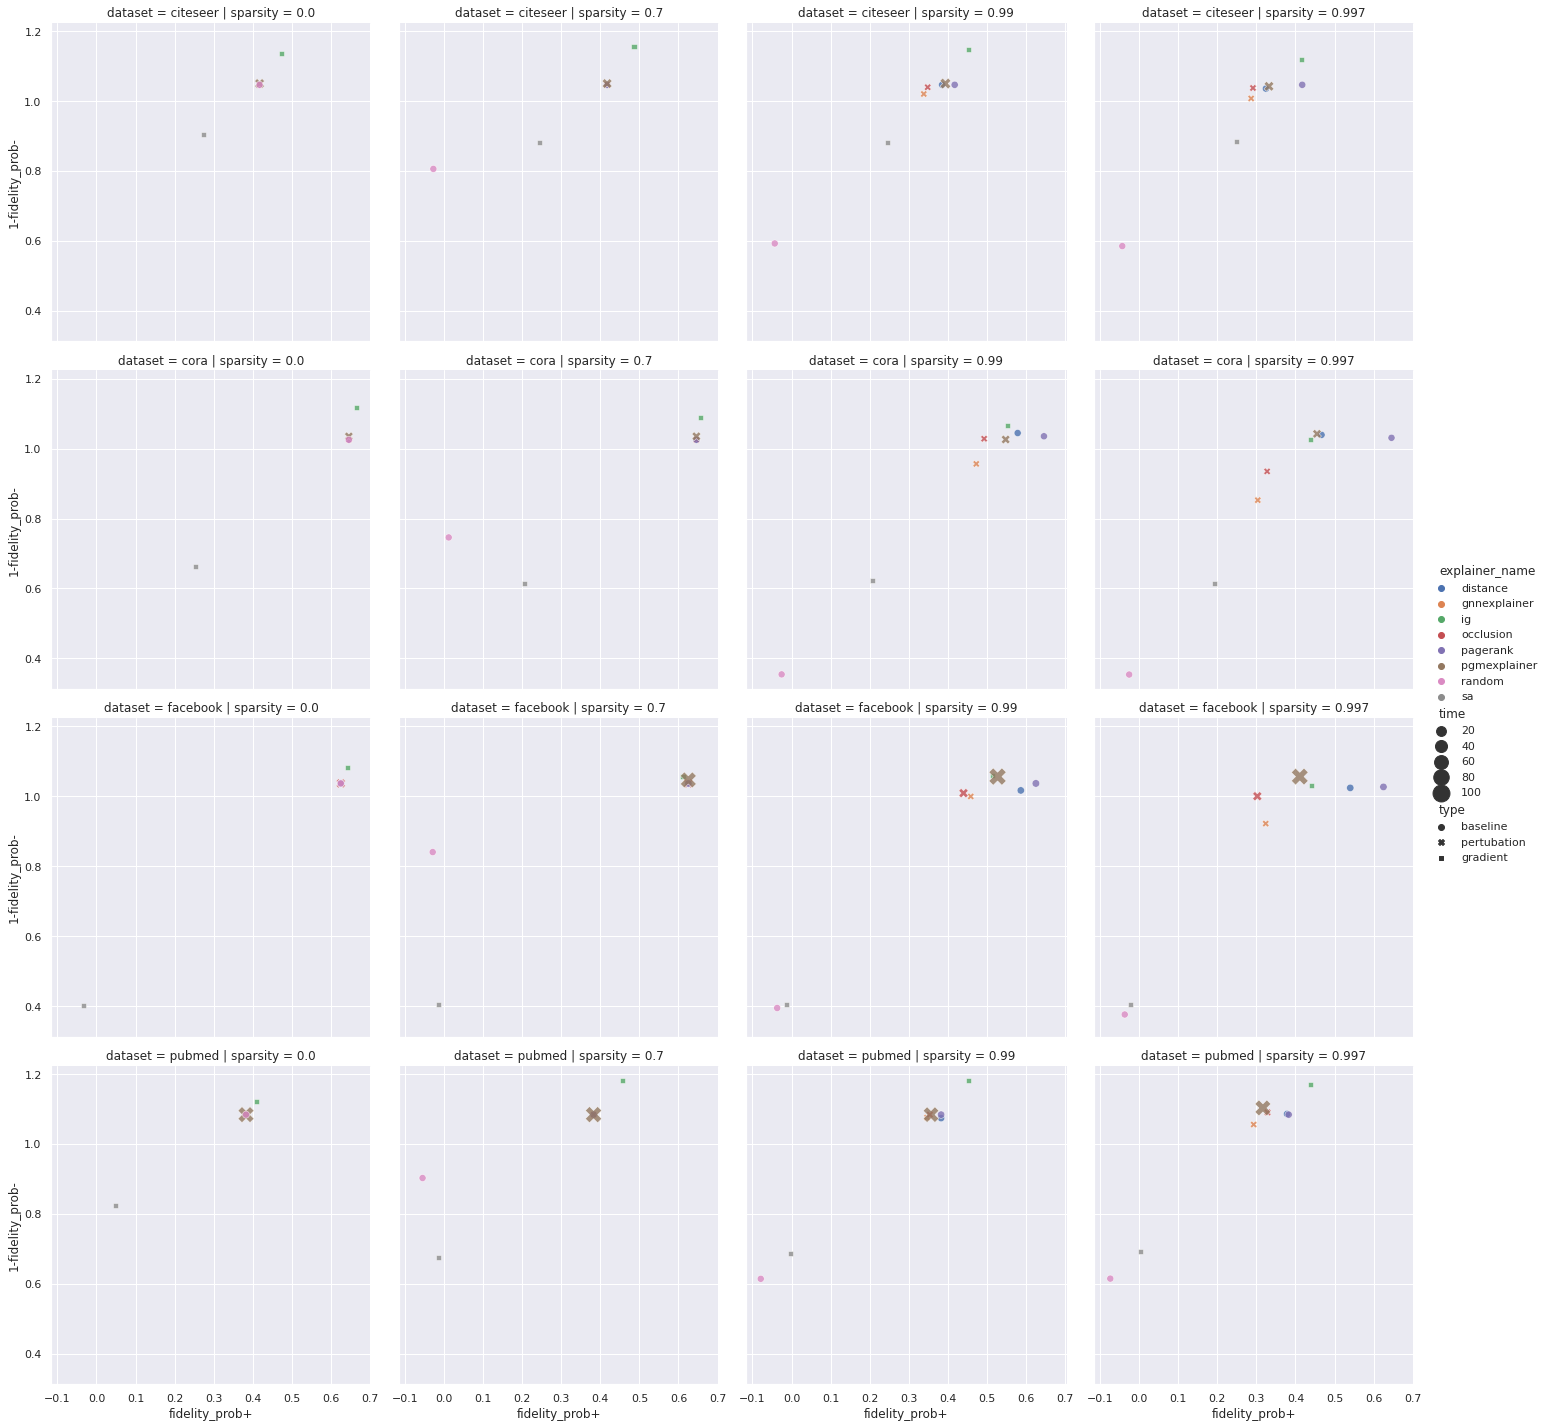

In [17]:
#### Fidelity Prob VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_hard,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )

In [ ]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_hard,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )

## Soft mask

In [ ]:
df_soft = df[df.hard_mask==False]

In [ ]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_soft[df_soft.dataset=="cora"],
    x="sparsity", y="fidelity_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

In [ ]:
#### Fidelity Prob VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_soft,
        x="fidelity_prob+", y="1-fidelity_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )

In [ ]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_soft,
        x="fidelity_acc+", y="1-fidelity_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )

# Explain focus: GNN model

true_label_as_target = False

In [ ]:
df_gnn = df_sparsity[df_sparsity['true_label_as_target']==False]

In [ ]:
df_gnn["1-fidelity_gnn_acc-"] = 1- df_gnn["fidelity_gnn_acc-"]
df_gnn["1-fidelity_gnn_prob-"] = 1- df_gnn["fidelity_gnn_prob-"]
df_gnn['charact_gnn'] = 2 * df_gnn['fidelity_gnn_prob+'] * (1-df_gnn['fidelity_gnn_prob-'])/ (df_gnn['fidelity_gnn_prob+']  + 1-df_gnn['fidelity_gnn_prob-'])


## Hard mask

In [ ]:
df_gnn_hard = df_gnn[df_gnn.hard_mask==False]

In [ ]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_hard[df_gnn_hard.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity_gnn')
plt.show()

In [ ]:
#### Fidelity Prob VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_gnn_hard,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )

In [ ]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )

## Soft mask

In [ ]:
df_gnn_soft = df_gnn[df_gnn.hard_mask==False]

In [ ]:
#### Fidelity Prob VS Sparsity ####

fig, ax = plt.subplots(figsize=(15,8))
g0 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob+",
    hue="explainer_name", marker="o", linestyle='--', ax=ax, legend=False)
for line in g0.lines:
    line.set_linestyle("--")

g1 = sns.lineplot(
    data=df_gnn_soft[df_gnn_soft.dataset=="cora"],
    x="sparsity", y="fidelity_gnn_prob-",
    hue="explainer_name", marker="o", ax=ax)


plt.ylabel('fidelity')
plt.show()

In [ ]:
#### Fidelity Prob VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_prob+", y="1-fidelity_gnn_prob-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )

In [ ]:
#### Fidelity Acc VS datasets & sparsity ####
sns.set()
sns.relplot(
        data=df_gnn_soft,
        x="fidelity_gnn_acc+", y="1-fidelity_gnn_acc-", col="sparsity", row="dataset", 
        hue="explainer_name", size="time", sizes=(50, 300), style="type", alpha = .8
    )